In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

['BE3_31', 'BD1_11', 'LS_VEG1', 'tobacco', 'L_BR_FQ', 'L_OUT_FQ']

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # ÏòàÏãú: ÎßëÏùÄ Í≥†ÎîïÏúºÎ°ú ÏÑ§Ï†ï (Windows ÌôòÍ≤Ω Ïãú)
plt.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv("Í±¥Í∞ïÎç∞Ïù¥ÌÑ∞_2022_2023_Ìï©Î≥∏.csv")

In [5]:
df = df[(df['HE_glu'] >= 50) & (df['HE_glu'] <= 400)]

Ï†ÑÏ≤òÎ¶¨ 

In [6]:
df['BE3_31'] = df['BE3_31'].astype(str).str.strip().replace({ #	1Ï£ºÏùºÍ∞Ñ Í±∑Í∏∞ ÏùºÏàò
'1.0' : 0,
'2.0' : 1,
'3.0' : 2,
'4.0' : 3,
'5.0' : 4,
'6.0' : 5,
'7.0' : 6,
'8.0' : 7,
'88.0' : 0,
'99.0' : np.nan,
'nan' : np.nan
 })
df['BE3_31'] = pd.to_numeric(df['BE3_31'], errors='coerce')

In [7]:
df['LS_VEG1'] = df['LS_VEG1'].astype(str).str.strip().replace({  #ÏµúÍ∑º 1ÎÖÑ ÎèôÏïà ÌèâÍ∑† Ï±ÑÏÜåÎ•ò(ÍπÄÏπò Î∞è Ïû•ÏïÑÏ∞å Ï†úÏô∏), Î≤ÑÏÑØÎ•ò, Ìï¥Ï°∞Î•ò ÏÑ≠Ï∑® ÎπàÎèÑ
'1.0' : 1095, #1.0Ïù¥ 1ÎÖÑ ÎèôÏïà Ï±ÑÏÜå ÏÑ≠Ï∑®Í∞Ä ÌïòÎ£® 3Ìöå Ïù¥ÏÉÅÏù¥ÎØÄÎ°ú 365 * 3
'2.0' : 730,  #2.0Ïù¥ 1ÎÖÑ ÎèôÏïà Ï±ÑÏÜå ÏÑ≠Ï∑®Í∞Ä ÌïòÎ£® 2ÌöåÏù¥ÎØÄÎ°ú 365 * 2
'3.0' : 365,  #3.0Ïù¥ 1ÎÖÑ ÎèôÏïà Ï±ÑÏÜå ÏÑ≠Ï∑®Í∞Ä ÌïòÎ£® 1ÌöåÏù¥ÎØÄÎ°ú 365 * 1
'4.0' : 286,  #Ï£º 5-6Ìöå
'5.0' : 156,  #Ï£º 2-4Ìöå
'6.0' : 52,   #Ï£º 1Ìöå
'7.0' : 30,   
'8.0' : 12,
'9.0' : 6,
'99.0': np.nan,
'nan' : np.nan
})
df['LS_VEG1'] = pd.to_numeric(df['LS_VEG1'], errors='coerce')

In [8]:
# ÏùºÎ∞ò Îã¥Î∞∞ ÌïòÎ£® ÌèâÍ∑† Ìù°Ïó∞Îüâ Ï≤òÎ¶¨
df['BS3_2'] = df['BS3_2'].replace(888, 0)

# Ï†ÑÏûê Îã¥Î∞∞ ÌïòÎ£® ÌèâÍ∑† Ìù°Ïó∞Îüâ Ï≤òÎ¶¨
df['BS12_47_1'] = df['BS12_47_1'].replace({888: 0, 999: np.nan}) 

# Ìï©ÏπòÍ∏∞ Ï†Ñ Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÌôò
df['BS3_2'] = pd.to_numeric(df['BS3_2'], errors='coerce')
df['BS12_47_1'] = pd.to_numeric(df['BS12_47_1'], errors='coerce')

# Îëê Î≥ÄÏàò Ìï©ÏÇ∞ (NaNÏùÄ Î¨¥ÏãúÌïòÍ≥† Ìï©Ìï®)
df['tobacco'] = df[['BS3_2', 'BS12_47_1']].sum(axis=1, skipna=True)

df['tobacco'] = df['tobacco'].astype(str).str.strip().replace({  
'999.0': np.nan,
})

df['tobacco'] = pd.to_numeric(df['tobacco'], errors='coerce')

In [9]:
df['BD1_11'] = df['BD1_11'].astype(str).str.strip().replace({ #1ÎÖÑÍ∞Ñ ÏùåÏ£ºÎπàÎèÑ
'1.0' : 0,
'2.0' : 6,
'3.0' : 12,
'4.0' : 42,
'5.0' : 130,
'6.0' : 286,
'8.0' : 0,
'9.0' : np.nan,
'nan' : np.nan
})
df['BD1_11'] = pd.to_numeric(df['BD1_11'], errors='coerce')

In [10]:
df['L_BR_FQ'] = df['L_BR_FQ'].astype(str).str.strip().replace({
'1.0' : 6,
'2.0' : 3.5,
'3.0' : 1.5,
'4.0' : 0,
'9.0' : np.nan,
'nan' : np.nan
 })
df['L_BR_FQ'] = pd.to_numeric(df['L_BR_FQ'], errors='coerce')

In [11]:
df['L_OUT_FQ'] = df['L_OUT_FQ'].astype(str).str.strip().replace({ 
'1.0' : 730,
'2.0' : 365,
'3.0' : 286,
'4.0' : 182,
'5.0' : 78,
'6.0' : 24,
'7.0' : 6,
'9.0' : np.nan,
'nan' : np.nan
 })
df['L_OUT_FQ'] = pd.to_numeric(df['L_OUT_FQ'], errors='coerce')

In [12]:
import pandas as pd #Í≥†ÌòàÏïï ÌååÏÉùÎ≥ÄÏàò 

def classify_bp(row):
    sbp = row['HE_sbp1']
    dbp = row['HE_dbp1']

    if sbp >= 140 or dbp >= 90:
        return '4'
    elif 130 <= sbp <= 139 or 80 <= dbp <= 89:
        return '3'
    elif 120 <= sbp <= 129 and dbp < 80:
        return '2'
    elif 0<=sbp<120 and dbp < 80:
        return '1'

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê ÏÉàÎ°úÏö¥ Ïó¥ Ï∂îÍ∞Ä
df['HE_HP2'] = df.apply(classify_bp, axis=1)
df['HE_HP2'] = pd.to_numeric(df['HE_HP2'], errors='coerce')


import pandas as pd #ÎãπÎá® ÌååÏÉùÎ≥ÄÏàò 

def classify_bp(row):
    glu = row['HE_glu']

    if glu <= 99:
        return '1'
    elif 100 <= glu <= 125:
        return '2'
    else:
        return '3'
    

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê ÏÉàÎ°úÏö¥ Ïó¥ Ï∂îÍ∞Ä
df['HE_DM_HbA1c2'] = df.apply(classify_bp, axis=1)
df['HE_DM_HbA1c2'] = pd.to_numeric(df['HE_DM_HbA1c2'], errors='coerce')


import pandas as pd #ÎπÑÎßå ÌååÏÉùÎ≥ÄÏàò 

def classify_bp(row):
    bmi = row['HE_BMI']

    if bmi <= 18.5:
        return '1'
    elif 18.5 < bmi <= 22.9:
        return '2'
    elif 22.9 < bmi <= 24.9:
        return '3'
    elif 24.9 < bmi <= 29.9:
        return '4'
    elif 29.9 < bmi <= 34.9:
        return '5'
    else:
        return '6'
    

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê ÏÉàÎ°úÏö¥ Ïó¥ Ï∂îÍ∞Ä
df['HE_obe2'] = df.apply(classify_bp, axis=1)
df['HE_obe2'] = pd.to_numeric(df['HE_obe2'], errors='coerce')

Silhouette Score: 0.3627


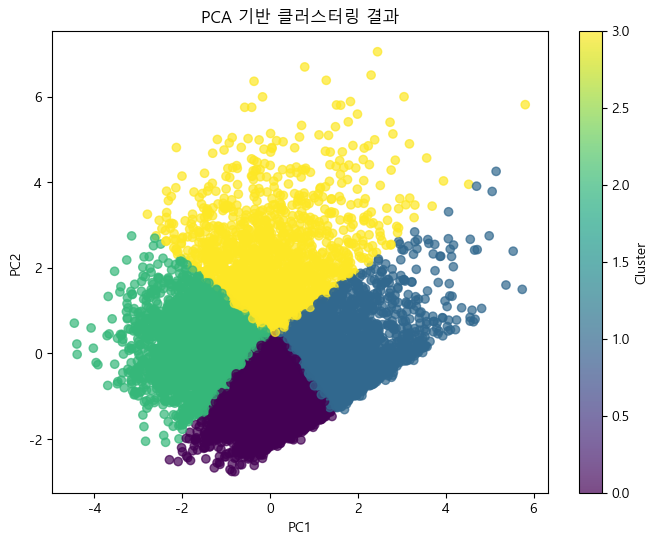

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# ÏÇ¨Ïö©Ìï† feature ÏÑ†ÌÉù
features = ['BE3_31', 'BD1_11', 'LS_VEG1', 'tobacco', 'L_BR_FQ', 'L_OUT_FQ', 'HE_sbp1', 'HE_dbp1']

# Í≤∞Ï∏°Ïπò Ï†úÍ±∞ 
df_dropna = df[features].dropna()

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_dropna)

# PCAÎ°ú 2Ï∞®Ïõê Ï∂ïÏÜå
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (Ïòà: ÌÅ¥Îü¨Ïä§ÌÑ∞ 3Í∞ú)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Ïã§Î£®Ïó£ Ï†êÏàò ÌôïÏù∏
score = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {score:.4f}")

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title('PCA Í∏∞Î∞ò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()


Explained Variance Ratio (PC1, PC2): [0.26103475 0.20237019]
Total Explained Variance: 0.4634
Silhouette Score: 0.3504

Cluster Characteristics (Mean Values):
           BE3_31      BD1_11     LS_VEG1    tobacco    L_OUT_FQ     HE_sbp1  \
Cluster                                                                        
0        4.366111   12.893827  949.508132   0.172707   96.183118  120.396466   
1        2.937269   17.468167  740.078581   0.471534  243.588859  105.114092   
2        3.521073   80.717402  716.179675   5.215736  283.087435  119.248585   
3        4.377732   36.928641  960.195437   0.590597   98.006938  143.455812   
4        3.200546  189.328467  776.446727  14.239316  290.795892  132.866584   

           HE_dbp1  
Cluster             
0        72.861679  
1        64.720750  
2        76.087494  
3        86.118636  
4        84.947631  

Number of Data Points per Cluster:
Cluster
0    3704
1    3133
2    1990
3    2091
4     824
Name: count, dtype: int64


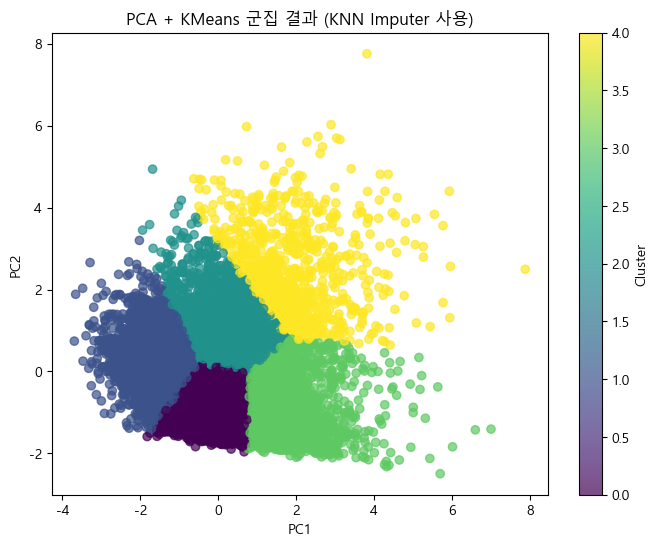

In [17]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ÏÇ¨Ïö©Ìï† feature ÏÑ†ÌÉù
features = ['BE3_31', 'BD1_11', 'LS_VEG1', 'tobacco', 'L_OUT_FQ', 'HE_sbp1', 'HE_dbp1']
X = df[features]

# 1. Í≤∞Ï∏°Ïπò ÎåÄÏ≤¥: KNNImputer ÏÇ¨Ïö©
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=features, index=df.index)

# 2. ÌëúÏ§ÄÌôî
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 3. PCA Ï∞®Ïõê Ï∂ïÏÜå (2Ï∞®Ïõê)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio (PC1, PC2): {explained_variance_ratio}")
print(f"Total Explained Variance: {sum(explained_variance_ratio):.4f}")

# 4. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (4Í∞ú Íµ∞Ïßë)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

# 5. Ïã§Î£®Ïó£ Ï†êÏàò ÌôïÏù∏
score = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {score:.4f}")

# 6. ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎùºÎ≤®ÏùÑ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïóê Ï∂îÍ∞Ä
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = labels

# 7. Íµ∞ÏßëÎ≥Ñ ÌäπÏßï Î∂ÑÏÑù (ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞)
cluster_characteristics = df_with_clusters.groupby('Cluster')[features].mean()
print("\nCluster Characteristics (Mean Values):")
print(cluster_characteristics)

# 8. Íµ∞ÏßëÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏ Ïàò ÌôïÏù∏
cluster_counts = df_with_clusters['Cluster'].value_counts().sort_index()
print("\nNumber of Data Points per Cluster:")
print(cluster_counts)

# 9. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title('PCA + KMeans Íµ∞Ïßë Í≤∞Í≥º (KNN Imputer ÏÇ¨Ïö©)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

In [55]:
from scipy.stats import f_oneway

# Í∞Å featureÏóê ÎåÄÌï¥ ANOVA ÏàòÌñâ
anova_results = {}

for feature in features:
    groups = [group[feature].dropna() for name, group in df_with_clusters.groupby('Cluster')]
    
    # Íµ∞Ïßë ÏàòÍ∞Ä 2Í∞ú Ïù¥ÏÉÅÏù¥Í≥†, Í∞Å Í∑∏Î£πÏóê Îç∞Ïù¥ÌÑ∞Í∞Ä 2Í∞ú Ïù¥ÏÉÅ ÏûàÏñ¥Ïïº Ìï®
    if len(groups) >= 2 and all(len(g) > 1 for g in groups):
        f_stat, p_val = f_oneway(*groups)
        anova_results[feature] = {
            'F-statistic': f_stat,
            'p-value': p_val,
            'significant': p_val < 0.05
        }
    else:
        anova_results[feature] = {
            'F-statistic': None,
            'p-value': None,
            'significant': False,
            'note': 'Í∑∏Î£π Ïàò Î∂ÄÏ°± ÎòêÎäî Îç∞Ïù¥ÌÑ∞ Î∂ÄÏ°±'
        }

# Í≤∞Í≥º Ï∂úÎ†•
anova_df = pd.DataFrame(anova_results).T
print("\nüîç ANOVA Í≤∞Í≥º (ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ ÌèâÍ∑† Ï∞®Ïù¥ Ïú†ÏùòÏÑ±):")
print(anova_df.sort_values(by='p-value'))



üîç ANOVA Í≤∞Í≥º (ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ ÌèâÍ∑† Ï∞®Ïù¥ Ïú†ÏùòÏÑ±):
          F-statistic p-value significant
BD1_11     1432.37958     0.0        True
LS_VEG1   2418.870474     0.0        True
tobacco   1090.209338     0.0        True
L_BR_FQ   5434.633331     0.0        True
L_OUT_FQ   717.331226     0.0        True
HE_sbp1   3789.161575     0.0        True
HE_dbp1   3500.533152     0.0        True
BE3_31     103.209461     0.0        True


Explained Variance Ratio (PC1, PC2): [0.25247812 0.1850313 ]
Total Explained Variance: 0.4375
Silhouette Score: 0.4990

Cluster Characteristics (Mean Values):
           BE3_31      BD1_11     LS_VEG1    tobacco   L_BR_FQ    L_OUT_FQ  \
Cluster                                                                      
0        4.360430   18.438361  977.971952   0.297447  5.850017  118.761841   
1        3.460742   28.138854  638.316082   0.649583  1.993562  240.059328   
2        3.561033  146.800469  655.004695  13.468310  1.511737  301.269953   
3        4.305641  149.013333  973.761026   9.660513  5.676410  167.514872   

             HE_glu  
Cluster              
0        100.367988  
1         93.428932  
2        101.657277  
3        128.509744  

Number of Data Points per Cluster:
Cluster
0    5954
1    3961
2     852
3     975
Name: count, dtype: int64


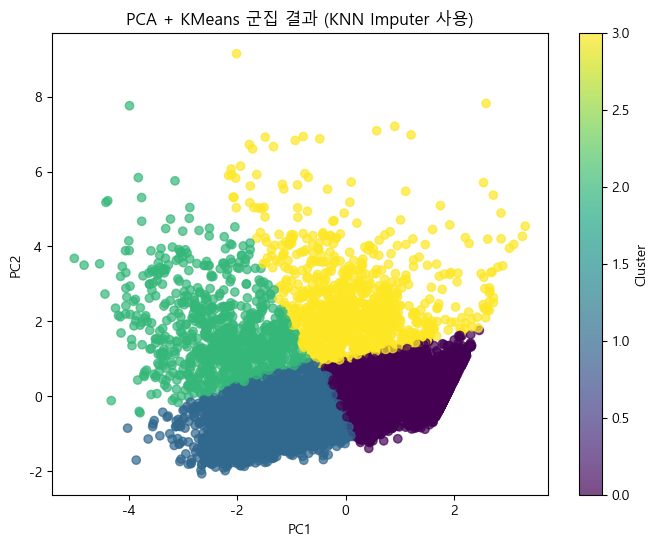

In [56]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ÏÇ¨Ïö©Ìï† feature ÏÑ†ÌÉù
features = ['BE3_31', 'BD1_11', 'LS_VEG1', 'tobacco', 'L_BR_FQ', 'L_OUT_FQ', 'HE_glu']
X = df[features]

# 1. Í≤∞Ï∏°Ïπò ÎåÄÏ≤¥: KNNImputer ÏÇ¨Ïö©
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=features, index=df.index)

# 2. ÌëúÏ§ÄÌôî
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 3. PCA Ï∞®Ïõê Ï∂ïÏÜå (2Ï∞®Ïõê)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio (PC1, PC2): {explained_variance_ratio}")
print(f"Total Explained Variance: {sum(explained_variance_ratio):.4f}")

# 4. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (4Í∞ú Íµ∞Ïßë)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

# 5. Ïã§Î£®Ïó£ Ï†êÏàò ÌôïÏù∏
score = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {score:.4f}")

# 6. ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎùºÎ≤®ÏùÑ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïóê Ï∂îÍ∞Ä
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = labels

# 7. Íµ∞ÏßëÎ≥Ñ ÌäπÏßï Î∂ÑÏÑù (ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞)
cluster_characteristics = df_with_clusters.groupby('Cluster')[features].mean()
print("\nCluster Characteristics (Mean Values):")
print(cluster_characteristics)

# 8. Íµ∞ÏßëÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏ Ïàò ÌôïÏù∏
cluster_counts = df_with_clusters['Cluster'].value_counts().sort_index()
print("\nNumber of Data Points per Cluster:")
print(cluster_counts)

# 9. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title('PCA + KMeans Íµ∞Ïßë Í≤∞Í≥º (KNN Imputer ÏÇ¨Ïö©)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

Explained Variance Ratio (PC1, PC2): [0.25024352 0.17636495]
Total Explained Variance: 0.4266
Silhouette Score: 0.4907

Cluster Characteristics (Mean Values):
           BE3_31      BD1_11     LS_VEG1    tobacco   L_BR_FQ    L_OUT_FQ  \
Cluster                                                                      
0        4.352091   17.423148  979.853015   0.249454  5.853435  118.112380   
1        3.381165   25.709339  632.838667   0.551679  1.976522  235.180745   
2        3.736559  137.701075  646.349462  12.531183  1.243011  296.064516   
3        4.422159  154.552053  966.709647   9.547278  5.744031  193.906399   

            HE_BMI  
Cluster             
0        23.607665  
1        23.231531  
2        25.819899  
3        25.603980  

Number of Data Points per Cluster:
Cluster
0    5953
1    3812
2     930
3    1047
Name: count, dtype: int64


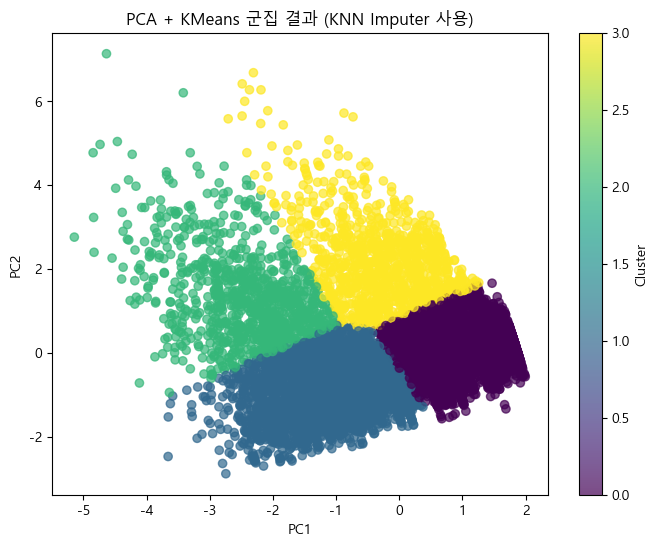

In [60]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ÏÇ¨Ïö©Ìï† feature ÏÑ†ÌÉù
features = ['BE3_31', 'BD1_11', 'LS_VEG1', 'tobacco', 'L_BR_FQ', 'L_OUT_FQ', 'HE_BMI']
X = df[features]

# 1. Í≤∞Ï∏°Ïπò ÎåÄÏ≤¥: KNNImputer ÏÇ¨Ïö©
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=features, index=df.index)

# 2. ÌëúÏ§ÄÌôî
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 3. PCA Ï∞®Ïõê Ï∂ïÏÜå (2Ï∞®Ïõê)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio (PC1, PC2): {explained_variance_ratio}")
print(f"Total Explained Variance: {sum(explained_variance_ratio):.4f}")

# 4. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (4Í∞ú Íµ∞Ïßë)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

# 5. Ïã§Î£®Ïó£ Ï†êÏàò ÌôïÏù∏
score = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {score:.4f}")

# 6. ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎùºÎ≤®ÏùÑ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïóê Ï∂îÍ∞Ä
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = labels

# 7. Íµ∞ÏßëÎ≥Ñ ÌäπÏßï Î∂ÑÏÑù (ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞)
cluster_characteristics = df_with_clusters.groupby('Cluster')[features].mean()
print("\nCluster Characteristics (Mean Values):")
print(cluster_characteristics)

# 8. Íµ∞ÏßëÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏ Ïàò ÌôïÏù∏
cluster_counts = df_with_clusters['Cluster'].value_counts().sort_index()
print("\nNumber of Data Points per Cluster:")
print(cluster_counts)

# 9. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title('PCA + KMeans Íµ∞Ïßë Í≤∞Í≥º (KNN Imputer ÏÇ¨Ïö©)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

Explained Variance Ratio (PC1, PC2): [0.26176077 0.15933567]
Total Explained Variance: 0.4211
Silhouette Score: 0.3333

Cluster Characteristics (Mean Values):
           BE3_31      BD1_11     LS_VEG1    tobacco     HE_sbp1    HE_dbp1  \
Cluster                                                                       
0        4.390753   19.637435  955.260946   0.205413  130.045123  78.639708   
1        2.928281   18.675065  720.264522   0.471100  103.216098  63.845582   
2        3.086460  188.879765  753.195084  16.544919  131.095808  83.300898   
3        3.405632  100.949367  683.108206   7.192822  117.120199  74.130868   
4        3.966736   15.669833  893.106311   0.178630  114.935558  70.636814   
5        4.096747   57.401600  923.527347   1.251603  147.008621  88.780564   

             HE_glu     HE_BMI  
Cluster                         
0        104.175630  25.125049  
1         89.529590  20.599661  
2        110.046852  25.758392  
3         98.661088  24.235534  
4         

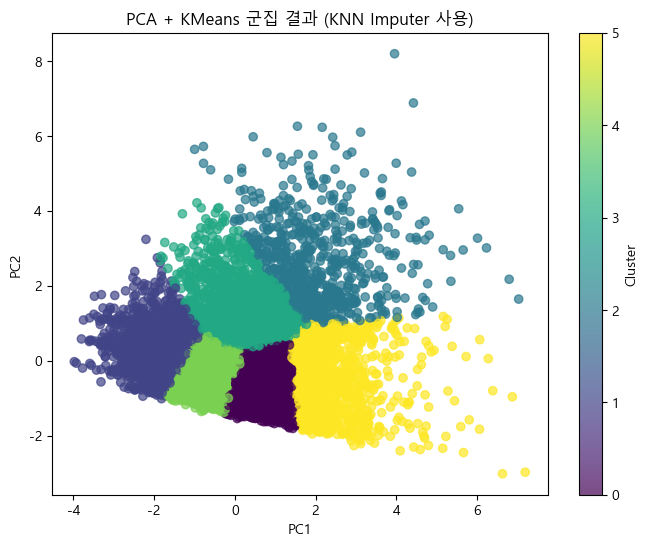

In [24]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ÏÇ¨Ïö©Ìï† feature ÏÑ†ÌÉù
features = ['BE3_31', 'BD1_11', 'LS_VEG1', 'tobacco', 'HE_sbp1', 'HE_dbp1', 'HE_glu','HE_BMI']
X = df[features]

# 1. Í≤∞Ï∏°Ïπò ÎåÄÏ≤¥: KNNImputer ÏÇ¨Ïö©
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=features, index=df.index)

# 2. ÌëúÏ§ÄÌôî
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 3. PCA Ï∞®Ïõê Ï∂ïÏÜå (2Ï∞®Ïõê)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio (PC1, PC2): {explained_variance_ratio}")
print(f"Total Explained Variance: {sum(explained_variance_ratio):.4f}")

# 4. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (4Í∞ú Íµ∞Ïßë)
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

# 5. Ïã§Î£®Ïó£ Ï†êÏàò ÌôïÏù∏
score = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {score:.4f}")

# 6. ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎùºÎ≤®ÏùÑ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïóê Ï∂îÍ∞Ä
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = labels

# 7. Íµ∞ÏßëÎ≥Ñ ÌäπÏßï Î∂ÑÏÑù (ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞)
cluster_characteristics = df_with_clusters.groupby('Cluster')[features].mean()
print("\nCluster Characteristics (Mean Values):")
print(cluster_characteristics)

# 8. Íµ∞ÏßëÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏ Ïàò ÌôïÏù∏
cluster_counts = df_with_clusters['Cluster'].value_counts().sort_index()
print("\nNumber of Data Points per Cluster:")
print(cluster_counts)

# 9. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title('PCA + KMeans Íµ∞Ïßë Í≤∞Í≥º (KNN Imputer ÏÇ¨Ïö©)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

In [14]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# ÏÇ¨Ïö©Ìï† ÌîºÏ≤ò
features = ['BE3_31', 'BD1_11', 'LS_VEG1', 'tobacco', 'L_BR_FQ', 'L_OUT_FQ']

for label in [1, 2, 3, 4]:
    print(f"\n=== HE_HP2 = {label} Íµ∞ÏßëÌôî ===")

    # Ìï¥Îãπ Í∑∏Î£πÎßå ÌïÑÌÑ∞ÎßÅ
    df_group = df[df['HE_HP2'] == label].dropna(subset=features)
    
    # Ïä§ÏºÄÏùºÎßÅ
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_group[features])
    
    # PCA ÏàòÌñâ
    pca = PCA(n_components=len(features))
    X_pca = pca.fit_transform(X_scaled)
    
    # Ï£ºÏÑ±Î∂Ñ Í∏∞Ïó¨ÎèÑ (Î°úÎî©Í∞í)
    loading = pd.DataFrame(pca.components_.T, index=features, columns=[f'PC{i+1}' for i in range(len(features))])
    print("PCA Î°úÎî©Í∞í:\n", loading)

    # Í∞ÄÏû• Í∏∞Ïó¨ÎèÑÍ∞Ä ÎÜíÏùÄ ÌîºÏ≤ò 2~3Í∞ú ÏÑ†ÌÉù (PC1 Í∏∞Ï§Ä)
    top_features = loading['PC1'].abs().sort_values(ascending=False).head(4).index.tolist()
    print("ÏÑ†ÌÉùÎêú ÌîºÏ≤ò:", top_features)

    # ÏÑ†ÌÉùÎêú ÌîºÏ≤òÎ°ú Îã§Ïãú Ïä§ÏºÄÏùºÎßÅ ‚Üí ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
    X_selected = scaler.fit_transform(df_group[top_features])
    
    # Íµ∞Ïßë Ïàò Í≤∞Ï†ï (Ïó¨Í∏∞ÏÑúÎäî ÏòàÏãúÎ°ú 2~4Í∞ú Ï§ë Í∞ÄÏû• ÎÜíÏùÄ Ïã§Î£®Ïó£ Ï†êÏàò ÏÑ†ÌÉù)
    best_score = -1
    best_k = 2
    for k in range(2, 5):
        kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
        labels = kmeans.fit_predict(X_selected)
        score = silhouette_score(X_selected, labels)
        print(f"k={k}, Ïã§Î£®Ïó£ Ï†êÏàò={score:.3f}")
        if score > best_score:
            best_score = score
            best_k = k

    print(f"‚Üí ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: {best_k}, ÏµúÍ≥† Ïã§Î£®Ïó£ Ï†êÏàò: {best_score:.3f}")



=== HE_HP2 = 1 Íµ∞ÏßëÌôî ===
PCA Î°úÎî©Í∞í:
                PC1       PC2       PC3       PC4       PC5       PC6
BE3_31    0.102092  0.410944  0.646847  0.528517 -0.350657 -0.000727
BD1_11   -0.256950  0.644576 -0.162163  0.193699  0.673320  0.036371
LS_VEG1   0.594932  0.184577 -0.348997  0.142683 -0.037791 -0.684399
tobacco  -0.281040  0.543196 -0.355180 -0.342502 -0.616751  0.045963
L_BR_FQ   0.634178  0.141701 -0.235245  0.053214 -0.004539  0.720795
L_OUT_FQ -0.297396 -0.257755 -0.501996  0.736649 -0.204572  0.092822
ÏÑ†ÌÉùÎêú ÌîºÏ≤ò: ['L_BR_FQ', 'LS_VEG1', 'L_OUT_FQ', 'tobacco']
k=2, Ïã§Î£®Ïó£ Ï†êÏàò=0.349
k=3, Ïã§Î£®Ïó£ Ï†êÏàò=0.278
k=4, Ïã§Î£®Ïó£ Ï†êÏàò=0.303
‚Üí ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: 2, ÏµúÍ≥† Ïã§Î£®Ïó£ Ï†êÏàò: 0.349

=== HE_HP2 = 2 Íµ∞ÏßëÌôî ===
PCA Î°úÎî©Í∞í:
                PC1       PC2       PC3       PC4       PC5       PC6
BE3_31    0.132221 -0.055209  0.905723  0.174901 -0.358233  0.014629
BD1_11   -0.222582  0.651373  0.317669  0.051955  0.648064  0.050700
LS_VEG1

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Î∂ÑÏÑùÏóê ÏÇ¨Ïö©Ìï† ÌîºÏ≤òÎì§
features = ['BE3_31', 'BD1_11', 'LS_VEG1', 'tobacco', 'L_BR_FQ', 'L_OUT_FQ']

# 1. Í∞Å ÌîºÏ≤òÏùò Í≤∞Ï∏°Í∞íÏùÑ ÏµúÎπàÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
df_filled = df.copy()
for col in features:
    mode_value = df_filled[col].mode()[0]  # ÏµúÎπàÍ∞í Í≥ÑÏÇ∞
    df_filled[col] = df_filled[col].fillna(mode_value)

# 2. Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filled[features])

# 3. PCA ÏàòÌñâ
pca = PCA(n_components=len(features))
pca.fit(X_scaled)

# 4. Ï£ºÏÑ±Î∂ÑÎ≥Ñ Î°úÎî©Í∞í(Í∏∞Ïó¨ÎèÑ) ÌôïÏù∏
loading_all = pd.DataFrame(
    pca.components_.T,
    index=features,
    columns=[f'PC{i+1}' for i in range(len(features))]
)

# 5. PC1 Í∏∞Ï§Ä Í∏∞Ïó¨ÎèÑ ÌÅ∞ ÌîºÏ≤ò 3Í∞ú ÏÑ†ÌÉù
common_features = loading_all['PC1'].abs().sort_values(ascending=False).head(3).index.tolist()

print("Í≥µÌÜµ ÌîºÏ≤ò (ÏµúÎπàÍ∞í ÎåÄÏ≤¥ ÌõÑ):", common_features)


Í≥µÌÜµ ÌîºÏ≤ò (ÏµúÎπàÍ∞í ÎåÄÏ≤¥ ÌõÑ): ['L_BR_FQ', 'LS_VEG1', 'L_OUT_FQ']


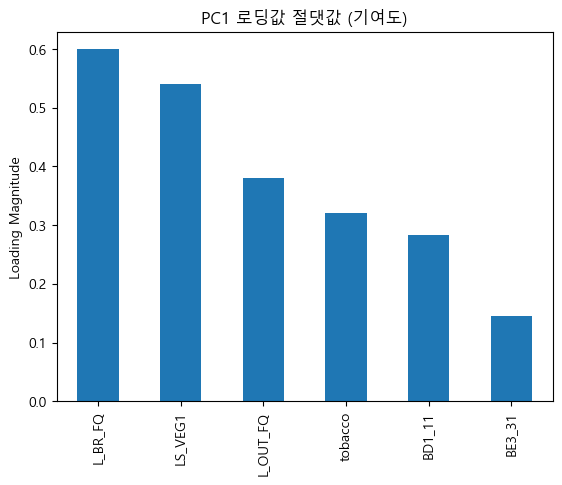

In [15]:
import matplotlib.pyplot as plt

loading_all['PC1'].abs().sort_values(ascending=False).plot(kind='bar')
plt.title('PC1 Î°úÎî©Í∞í Ï†àÎåìÍ∞í (Í∏∞Ïó¨ÎèÑ)')
plt.ylabel('Loading Magnitude')
plt.show()

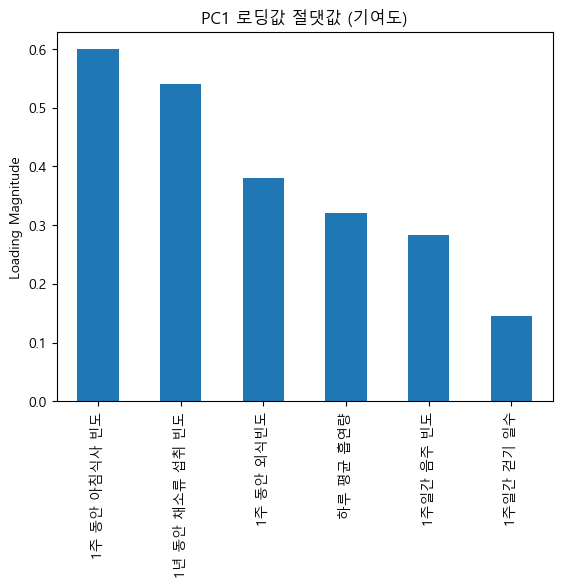

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Î∂ÑÏÑùÏóê ÏÇ¨Ïö©Ìï† ÌîºÏ≤òÎì§
features = ['BE3_31', 'BD1_11', 'LS_VEG1', 'tobacco', 'L_BR_FQ', 'L_OUT_FQ']

# ÌîºÏ≤òÎ•º ÌïúÍµ≠Ïñ¥ Ïù¥Î¶ÑÍ≥º Îß§ÌïëÌïòÎäî ÎîïÏÖîÎÑàÎ¶¨
korean_feature_names = {
    'BE3_31': '1Ï£ºÏùºÍ∞Ñ Í±∑Í∏∞ ÏùºÏàò',
    'BD1_11': '1Ï£ºÏùºÍ∞Ñ ÏùåÏ£º ÎπàÎèÑ',
    'LS_VEG1': '1ÎÖÑ ÎèôÏïà Ï±ÑÏÜåÎ•ò ÏÑ≠Ï∑® ÎπàÎèÑ',
    'tobacco': 'ÌïòÎ£® ÌèâÍ∑† Ìù°Ïó∞Îüâ',
    'L_BR_FQ': '1Ï£º ÎèôÏïà ÏïÑÏπ®ÏãùÏÇ¨ ÎπàÎèÑ',
    'L_OUT_FQ': '1Ï£º ÎèôÏïà Ïô∏ÏãùÎπàÎèÑ'
}

# 1. Í∞Å ÌîºÏ≤òÏùò Í≤∞Ï∏°Í∞íÏùÑ ÏµúÎπàÍ∞íÏúºÎ°ú ÎåÄÏ≤¥ (dfÎäî Ï†ïÏùòÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ï)
# df_filled = df.copy() # dfÍ∞Ä Ï†ïÏùòÎêòÏñ¥ ÏûàÏßÄ ÏïäÏïÑ Ï£ºÏÑù Ï≤òÎ¶¨ÌñàÏäµÎãàÎã§.
# for col in features:
#     mode_value = df_filled[col].mode()[0]
#     df_filled[col] = df_filled[col].fillna(mode_value)

# # 2. Ïä§ÏºÄÏùºÎßÅ (df_filledÍ∞Ä Ï†ïÏùòÎêòÏñ¥ ÏûàÏßÄ ÏïäÏïÑ Ï£ºÏÑù Ï≤òÎ¶¨ÌñàÏäµÎãàÎã§.)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df_filled[features])

# # 3. PCA ÏàòÌñâ (X_scaledÍ∞Ä Ï†ïÏùòÎêòÏñ¥ ÏûàÏßÄ ÏïäÏïÑ Ï£ºÏÑù Ï≤òÎ¶¨ÌñàÏäµÎãàÎã§.)
# pca = PCA(n_components=len(features))
# pca.fit(X_scaled)

# 4. Ï£ºÏÑ±Î∂ÑÎ≥Ñ Î°úÎî©Í∞í(Í∏∞Ïó¨ÎèÑ) ÌôïÏù∏ (Í∏∞Ï°¥ ÏΩîÎìúÏôÄ ÎèôÏùº)
# loading_all = pd.DataFrame(
#     pca.components_.T,
#     index=features,
#     columns=[f'PC{i+1}' for i in range(len(features))]
# )

# 5. PC1 Í∏∞Ï§Ä Í∏∞Ïó¨ÎèÑ ÌÅ∞ ÌîºÏ≤ò 3Í∞ú ÏÑ†ÌÉù (Í∏∞Ï°¥ ÏΩîÎìúÏôÄ ÎèôÏùº)
common_features = loading_all['PC1'].abs().sort_values(ascending=False).head(3).index.tolist()

# Ìè∞Ìä∏ ÏÑ§Ï†ï (ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ)
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows ÏÇ¨Ïö©Ïûê
# plt.rcParams['font.family'] = 'AppleGothic' # macOS ÏÇ¨Ïö©Ïûê
plt.rcParams['axes.unicode_minus'] = False # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
# Ïù∏Îç±Ïä§Î•º ÌïúÍµ≠Ïñ¥ Ïù¥Î¶ÑÏúºÎ°ú Î≥ÄÍ≤ΩÌïòÏó¨ ÌîåÎ°úÌåÖ
loading_all['PC1'].abs().sort_values(ascending=False).rename(index=korean_feature_names).plot(kind='bar')
plt.title('PC1 Î°úÎî©Í∞í Ï†àÎåìÍ∞í (Í∏∞Ïó¨ÎèÑ)')
plt.ylabel('Loading Magnitude')
plt.show()

In [16]:
print(pca.explained_variance_ratio_)
#PCA Î∂ÑÏÑù Í≤∞Í≥º, Ï≤´ Î≤àÏß∏ Ï£ºÏÑ±Î∂Ñ(PC1)ÏùÄ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÇ∞Ïùò ÏïΩ 29%Î•º ÏÑ§Î™ÖÌïòÎ©∞ Í∞ÄÏû• ÌÅ∞ Ï†ïÎ≥¥Î•º Îã¥Í≥† ÏûàÏäµÎãàÎã§.
#Îî∞ÎùºÏÑú PC1ÏóêÏÑúÏùò Î°úÎî©Í∞í(Í∏∞Ïó¨ÎèÑ)ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏãùÏÇ¨ Í¥ÄÎ†® ÌîºÏ≤ò(ÏïÑÏπ®ÏãùÏÇ¨ ÎπàÎèÑ, Ïô∏Ïãù ÎπàÎèÑ, Ï±ÑÏÜå ÏÑ≠Ï∑® ÎπàÎèÑ)Ïùò ÏÉÅÎåÄÏ†Å Ï§ëÏöîÎèÑÎ•º ÎπÑÍµêÌïòÏòÄÍ≥†,
#Ïù¥ Ï§ë ÏïÑÏπ®ÏãùÏÇ¨ ÎπàÎèÑÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ Í∏∞Ïó¨ÎèÑÎ•º Î≥¥Ïó¨ ÏµúÏ¢Ö ÌîºÏ≤òÎ°ú ÏÑ†ÌÉùÌïòÏòÄÏäµÎãàÎã§.

[0.29126038 0.20028481 0.16943103 0.1440707  0.11751956 0.07743352]


Ïö∞Î¶¨Í∞Ä Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú PCAÎ•º ÏàòÌñâÌïú Ïù¥Ïú†Îäî
üëâ **‚ÄúÏ†ÑÏ≤¥ ÏÇ¨ÎûåÎì§Ïùò ÏÉùÌôúÏäµÍ¥Ä Ï§ëÏóêÏÑú Í∞ÄÏû• ÌïµÏã¨Ï†ÅÏù∏ ÌîºÏ≤òÍ∞Ä Î¨¥ÏóáÏù∏ÏßÄ‚Äù**Î•º Ï∞æÍ∏∞ ÏúÑÌï®Ïù¥ÏóêÏöî.

Í∑∏Î¶¨Í≥† Í∑∏ ÌïµÏã¨ ÌîºÏ≤ò(Ïòà: ÏïÑÏπ®ÏãùÏÇ¨, Ìù°Ïó∞, ÏùåÏ£º, Í±∑Í∏∞ Îì±)Î•º Í∏∞Ï§ÄÏúºÎ°ú
Î™®Îì† ÏßàÎ≥ëÏóê ÎåÄÌï¥ ÎèôÏùºÌïú ÌîºÏ≤òÎ°ú Íµ∞ÏßëÌôîÎ•º ÌïòÎ†§Îäî Î™©Ï†ÅÏù¥Ï£†.

"Ï†ÑÏ≤¥ PCA ‚Üí Í≥µÌÜµ ÌîºÏ≤ò ÏÑ†ÌÉù ‚Üí Í∞Å ÏßàÎ≥ëÍµ∞ÏóêÏÑú Îî∞Î°ú Íµ∞ÏßëÌôî"Îäî Ìï©Î¶¨Ï†ÅÏù∏ Ï†ÑÎûµÏûÖÎãàÎã§.
Ï†ÑÏ≤¥ PCAÎäî ÌîºÏ≤ò ÏÑ†ÌÉùÏùÑ ÏúÑÌïú ÌÜµÍ≥ÑÏ†Å ÎèÑÍµ¨Î°úÎßå Ïì∞Îäî Í±∞ÏòàÏöî.
(Ï†ÑÏ≤¥ ÏÇ¨ÎûåÎì§Ïùò Í±¥Í∞ï ÏäµÍ¥ÄÏóêÏÑú Ï§ëÏöîÌïú Î≥ÄÏàòÎ•º Ï∞æÍ∏∞ ÏúÑÌï¥)


[Ï≤¥Í≥ÑÏ†ÅÏù∏ ÌîºÏ≤ò ÏÑ†ÌÉù Ï†àÏ∞®]

1Ï∞®Î°ú ANOVA F-ÌÖåÏä§Ìä∏Î°ú Ïú†ÏùòÎØ∏Ìïú ÌîºÏ≤ò ÏÑ†Î≥Ñ

2Ï∞®Î°ú ÏãùÏÇ¨ Í¥ÄÎ†® ÌîºÏ≤ò Í∞Ñ Ï§ëÎ≥µÏÑ± Ï†úÍ±∞Î•º ÏúÑÌï¥ PCA Í∏∞Ïó¨ÎèÑ Í∏∞Î∞ò ÏÑ†ÌÉù
‚Üí Î∂ÑÏÑù ÌùêÎ¶ÑÏù¥ Î™ÖÌôïÌïòÍ≥† ÏùºÍ¥ÄÎêòÎ©∞, ÌÜµÍ≥ÑÏ†Å ÌÉÄÎãπÏÑ±Í≥º Ïã§Ïö©Ï†Å ÌåêÎã®(Ïï± Ï†ïÎ≥¥ Îã§ÏñëÏÑ± Í≥†Î†§)ÎèÑ Ìï®Íªò ÎÖπÏïÑÏûàÏäµÎãàÎã§.

PCA ÏàòÌñâ Î∞©ÏãùÏùò ÌÉÄÎãπÏÑ±

Ï†ÑÏ≤¥ 6Í∞úÏùò ÌîºÏ≤òÎ•º ÎåÄÏÉÅÏúºÎ°ú PCAÎ•º ÏàòÌñâÌïòÍ≥†, PC1 Í∏∞Ï§Ä Ï†àÎåÄ Î°úÎî©Í∞íÏùÑ Í∑ºÍ±∞Î°ú Í∏∞Ïó¨ÎèÑÎ•º ÌèâÍ∞ÄÌïú Î∞©ÏãùÏùÄ Ï†ÑÌòïÏ†ÅÏù¥Í≥† Ïûò ÏïåÎ†§ÏßÑ Î∞©Î≤ïÏûÖÎãàÎã§.

Í≤∞Ï∏°Í∞íÏùÄ ÏµúÎπàÍ∞íÏúºÎ°ú ÎåÄÏ≤¥ ‚Üí Îã®ÏàúÌïòÏßÄÎßå ÎπÑÏú®Ìòï Î≥ÄÏàòÏóê Î¨¥Î¶¨Í∞Ä ÏóÜÍ≥†, Í≥µÎ∞±ÏùÑ Î∞©ÏßÄÌï®.

ÏÑ†ÌÉù Í≤∞Í≥ºÏóê ÎåÄÌïú Í∑ºÍ±∞ Ï†úÏãú Í∞ÄÎä•

ÏïÑÏπ®ÏãùÏÇ¨Í∞Ä Ï±ÑÏÜåÏÑ≠Ï∑®ÎÇò Ïô∏ÏãùÎ≥¥Îã§ PC1ÏóêÏÑú Îçî ÎÜíÏùÄ Í∏∞Ïó¨ÎèÑÎ•º Î≥¥ÏòÄÎã§Îäî Ï†êÏùÄ Í∞ùÍ¥ÄÏ†ÅÏù∏ ÏàòÏπòÎ°ú Î≥¥Ïó¨Ï§Ñ Ïàò ÏûàÏñ¥ ÏÑ§ÎìùÎ†• ÎÜíÏäµÎãàÎã§.

PCA Î°úÎî© ÌÖåÏù¥Î∏îÏù¥ÎÇò Í∑∏ÎûòÌîÑÎ•º ÏãúÍ∞ÅÌôîÌï¥ÏÑú Ï†úÏãúÌïòÎ©¥ Ìõ®Ïî¨ Îçî Í∞ïÎ†•Ìïú Í∑ºÍ±∞Í∞Ä Îê©ÎãàÎã§.

ÌòÑÏã§Ï†Å Í≥†Î†§ÍπåÏßÄ Ìè¨Ìï®Îêú ÏÑ§Í≥Ñ

Ïï±ÏóêÏÑú Îã§ÏñëÌïú Ï†ïÎ≥¥Î•º Ï†úÍ≥µÌï¥Ïïº ÌïúÎã§Îäî Í¥ÄÏ†êÏóêÏÑú, ÏùåÏ£º/Ìù°Ïó∞/Í±∑Í∏∞Ïö¥ÎèôÏùÑ Ïú†ÏßÄÌïòÍ≥†, ÏãùÏÇ¨ Í¥ÄÎ†® ÌîºÏ≤òÎäî ÎåÄÌëú ÌïòÎÇòÎßå ÏÑ†ÌÉùÌïú Í≤ÉÎèÑ Ïã§Î¨¥Ï†ÅÏù¥Í≥† Ìï©Î¶¨Ï†ÅÏù∏ ÌåêÎã®ÏûÖÎãàÎã§.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Î∂ÑÏÑùÏóê ÏÇ¨Ïö©Ìï† ÌîºÏ≤òÎì§
features = ['LS_VEG1', 'L_BR_FQ', 'L_OUT_FQ']

# 1. Í∞Å ÌîºÏ≤òÏùò Í≤∞Ï∏°Í∞íÏùÑ ÏµúÎπàÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
df_filled = df.copy()
for col in features:
    mode_value = df_filled[col].mode()[0]  # ÏµúÎπàÍ∞í Í≥ÑÏÇ∞
    df_filled[col] = df_filled[col].fillna(mode_value)

# 2. Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filled[features])

# 3. PCA ÏàòÌñâ
pca = PCA(n_components=len(features))
pca.fit(X_scaled)

# 4. Ï£ºÏÑ±Î∂ÑÎ≥Ñ Î°úÎî©Í∞í(Í∏∞Ïó¨ÎèÑ) ÌôïÏù∏
loading_all = pd.DataFrame(
    pca.components_.T,
    index=features,
    columns=[f'PC{i+1}' for i in range(len(features))]
)

# 5. PC1 Í∏∞Ï§Ä Í∏∞Ïó¨ÎèÑ ÌÅ∞ ÌîºÏ≤ò 3Í∞ú ÏÑ†ÌÉù
common_features = loading_all['PC1'].abs().sort_values(ascending=False).head(3).index.tolist()

print("Í≥µÌÜµ ÌîºÏ≤ò (ÏµúÎπàÍ∞í ÎåÄÏ≤¥ ÌõÑ):", common_features)


Í≥µÌÜµ ÌîºÏ≤ò (ÏµúÎπàÍ∞í ÎåÄÏ≤¥ ÌõÑ): ['L_BR_FQ', 'LS_VEG1', 'L_OUT_FQ']


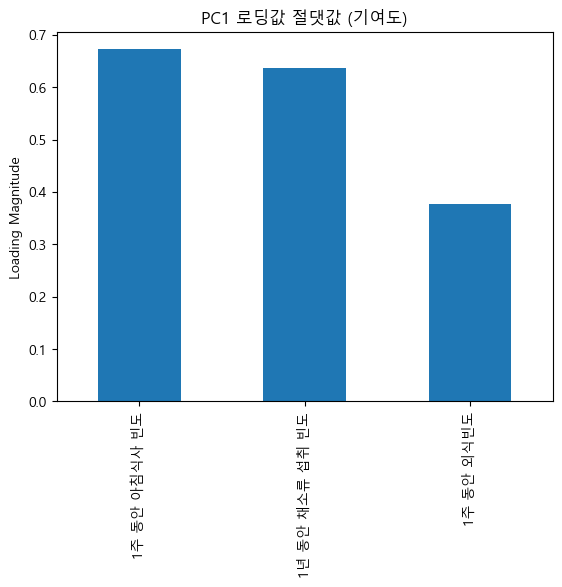

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Î∂ÑÏÑùÏóê ÏÇ¨Ïö©Ìï† ÌîºÏ≤òÎì§
features = ['BE3_31', 'BD1_11', 'LS_VEG1', 'tobacco', 'L_BR_FQ', 'L_OUT_FQ']

# ÌîºÏ≤òÎ•º ÌïúÍµ≠Ïñ¥ Ïù¥Î¶ÑÍ≥º Îß§ÌïëÌïòÎäî ÎîïÏÖîÎÑàÎ¶¨
korean_feature_names = {
    'BE3_31': '1Ï£ºÏùºÍ∞Ñ Í±∑Í∏∞ ÏùºÏàò',
    'BD1_11': '1Ï£ºÏùºÍ∞Ñ ÏùåÏ£º ÎπàÎèÑ',
    'LS_VEG1': '1ÎÖÑ ÎèôÏïà Ï±ÑÏÜåÎ•ò ÏÑ≠Ï∑® ÎπàÎèÑ',
    'tobacco': 'ÌïòÎ£® ÌèâÍ∑† Ìù°Ïó∞Îüâ',
    'L_BR_FQ': '1Ï£º ÎèôÏïà ÏïÑÏπ®ÏãùÏÇ¨ ÎπàÎèÑ',
    'L_OUT_FQ': '1Ï£º ÎèôÏïà Ïô∏ÏãùÎπàÎèÑ'
}

# 1. Í∞Å ÌîºÏ≤òÏùò Í≤∞Ï∏°Í∞íÏùÑ ÏµúÎπàÍ∞íÏúºÎ°ú ÎåÄÏ≤¥ (dfÎäî Ï†ïÏùòÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ï)
# df_filled = df.copy() # dfÍ∞Ä Ï†ïÏùòÎêòÏñ¥ ÏûàÏßÄ ÏïäÏïÑ Ï£ºÏÑù Ï≤òÎ¶¨ÌñàÏäµÎãàÎã§.
# for col in features:
#     mode_value = df_filled[col].mode()[0]
#     df_filled[col] = df_filled[col].fillna(mode_value)

# # 2. Ïä§ÏºÄÏùºÎßÅ (df_filledÍ∞Ä Ï†ïÏùòÎêòÏñ¥ ÏûàÏßÄ ÏïäÏïÑ Ï£ºÏÑù Ï≤òÎ¶¨ÌñàÏäµÎãàÎã§.)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df_filled[features])

# # 3. PCA ÏàòÌñâ (X_scaledÍ∞Ä Ï†ïÏùòÎêòÏñ¥ ÏûàÏßÄ ÏïäÏïÑ Ï£ºÏÑù Ï≤òÎ¶¨ÌñàÏäµÎãàÎã§.)
# pca = PCA(n_components=len(features))
# pca.fit(X_scaled)

# 4. Ï£ºÏÑ±Î∂ÑÎ≥Ñ Î°úÎî©Í∞í(Í∏∞Ïó¨ÎèÑ) ÌôïÏù∏ (Í∏∞Ï°¥ ÏΩîÎìúÏôÄ ÎèôÏùº)
# loading_all = pd.DataFrame(
#     pca.components_.T,
#     index=features,
#     columns=[f'PC{i+1}' for i in range(len(features))]
# )

# 5. PC1 Í∏∞Ï§Ä Í∏∞Ïó¨ÎèÑ ÌÅ∞ ÌîºÏ≤ò 3Í∞ú ÏÑ†ÌÉù (Í∏∞Ï°¥ ÏΩîÎìúÏôÄ ÎèôÏùº)
common_features = loading_all['PC1'].abs().sort_values(ascending=False).head(3).index.tolist()

# Ìè∞Ìä∏ ÏÑ§Ï†ï (ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ)
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows ÏÇ¨Ïö©Ïûê
# plt.rcParams['font.family'] = 'AppleGothic' # macOS ÏÇ¨Ïö©Ïûê
plt.rcParams['axes.unicode_minus'] = False # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
# Ïù∏Îç±Ïä§Î•º ÌïúÍµ≠Ïñ¥ Ïù¥Î¶ÑÏúºÎ°ú Î≥ÄÍ≤ΩÌïòÏó¨ ÌîåÎ°úÌåÖ
loading_all['PC1'].abs().sort_values(ascending=False).rename(index=korean_feature_names).plot(kind='bar')
plt.title('PC1 Î°úÎî©Í∞í Ï†àÎåìÍ∞í (Í∏∞Ïó¨ÎèÑ)')
plt.ylabel('Loading Magnitude')
plt.show()

In [14]:
print(pca.explained_variance_ratio_)

[0.54152997 0.30309186 0.15537817]
